# Python for data analysis


# 0) imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Dataframe creation for non binary data

## 1.1/ Cleaning by adding columns names and changing classes of drug use by integers (from 0 to 6)

In [ ]:
df = pd.read_csv('/content/drug_consumption.data', header=None)
df.columns=(['ID','Age','Gender','Education','Country','Ethnicity','Nscore','Escore','Oscore','Ascore','Cscore','Impulsive','SS','Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Choc','Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','Semer','VSA'])
df=df.replace({'CL': ''}, regex=True)
for column in ['Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Choc','Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','Semer','VSA']:
    df[column]=df[column].astype('int32')
df.dtypes


ID             int64
Age          float64
Gender       float64
Education    float64
Country      float64
Ethnicity    float64
Nscore       float64
Escore       float64
Oscore       float64
Ascore       float64
Cscore       float64
Impulsive    float64
SS           float64
Alcohol        int32
Amphet         int32
Amyl           int32
Benzos         int32
Caff           int32
Cannabis       int32
Choc           int32
Coke           int32
Crack          int32
Ecstasy        int32
Heroin         int32
Ketamine       int32
Legalh         int32
LSD            int32
Meth           int32
Mushrooms      int32
Nicotine       int32
Semer          int32
VSA            int32
dtype: object

In [ ]:
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,5,2,0,2,6,0,5,0,0,0,0,0,0,0,0,0,2,0,0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,2,2,0,6,4,6,3,0,4,0,2,0,2,3,0,4,0,0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6,0,0,0,6,3,4,0,0,0,0,0,0,0,0,1,0,0,0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,0,0,3,5,2,4,2,0,0,0,2,0,0,0,0,2,0,0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,1,1,0,6,3,6,0,0,1,0,0,1,0,0,2,2,0,0


# 2) Data-visualization

## 2.1/ Correlations 

### 2.1.1/ Corelation matrix 

                 ID       Age    Gender  ...  Nicotine     Semer       VSA
ID         1.000000  0.271395  0.025467  ...  0.063197  0.050454  0.101165
Age        0.271395  1.000000  0.110286  ...  0.248883  0.049729  0.229657
Gender     0.025467  0.110286  1.000000  ...  0.192084  0.013354  0.134852
Education  0.025253  0.158811  0.196774  ...  0.240547  0.036342  0.120540
Country    0.340751  0.354241  0.216271  ...  0.277913  0.068018  0.267033
Ethnicity  0.059309  0.069753  0.001213  ...  0.077724  0.022716  0.087011
Nscore     0.018639  0.136654  0.074646  ...  0.128430  0.001673  0.115086
Escore     0.046960  0.033849  0.057864  ...  0.019196  0.022909  0.032910
Oscore     0.173565  0.226778  0.131021  ...  0.195460  0.026774  0.150502
Ascore     0.028782  0.063504  0.219743  ...  0.111075  0.019750  0.114083
Cscore     0.072094  0.183564  0.183831  ...  0.230862  0.008524  0.159442
Impulsive  0.119663  0.190939  0.167492  ...  0.246299  0.011178  0.181019
SS         0.165882  0.33

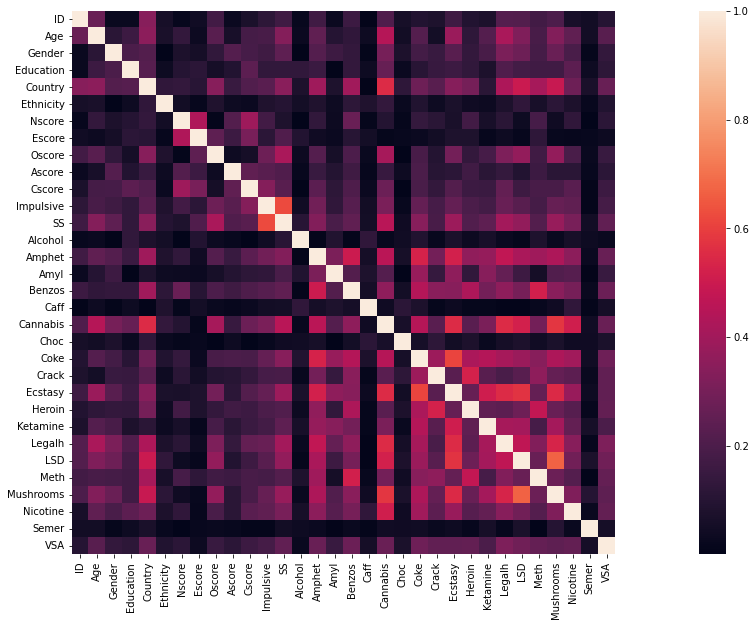

In [ ]:
data=df.copy()

corrmat = data.corr()
corrmat=np.absolute(corrmat)
plt.subplots(figsize=(30, 10))
sns.heatmap(corrmat, vmax=1, square=True)
print(corrmat)

### 2.1.2/ Fonction we used to print correlations under a certain threshold 

In [ ]:
def Corr_features(target,seuil):
    column_1 = df[target]
    liste=[]
    for column in data:
        column_2 = df[column]
        liste.append( column_1.corr(column_2))
    for i in range(len(liste)): 
        if abs(liste[i]) <seuil:print(liste[i],df.columns[i])

In [ ]:
Corr_features('Cannabis',0.05)

-0.014369423177773266 Escore
0.022955984259532596 Alcohol
0.04052709164842227 Caff
0.043968926079417145 Semer


##2.2/Visuals to understand the different features


### 2.2.1 Visuals that show the differents of use betweek a few drugs

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  app.launch_new_instance()


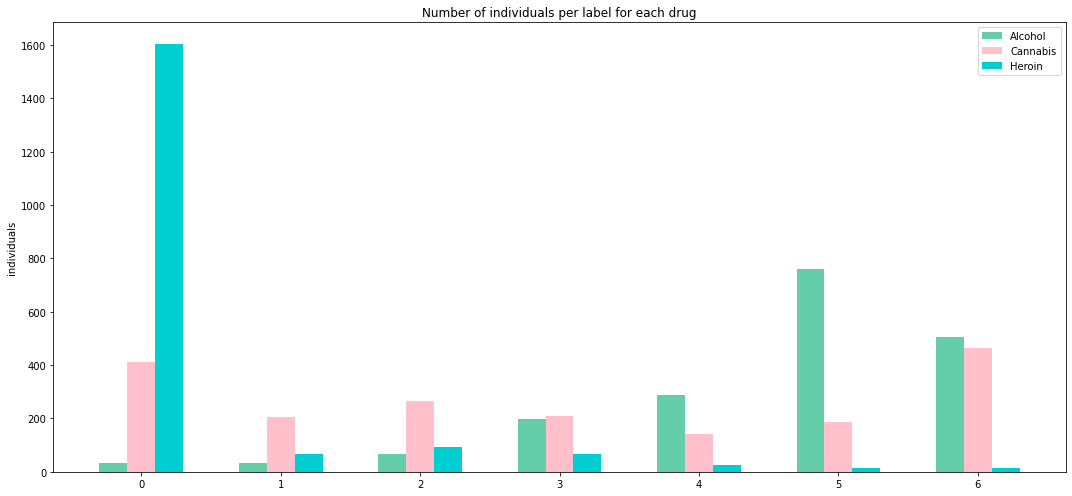

In [ ]:
labels = [i for i in range(7)]
alcohol = df['Alcohol'].value_counts().sort_index().tolist()
cannabis = df['Cannabis'].value_counts().sort_index().tolist()
heroin = df['Heroin'].value_counts().sort_index().tolist()

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 7))
rects1 = ax.bar(x - width, alcohol, width, label='Alcohol',color='mediumaquamarine')
rects2 = ax.bar(x, cannabis, width, label='Cannabis',color='pink')
rects3 = ax.bar(x + width, heroin, width, label='Heroin',color='darkturquoise')

ax.set_ylabel('individuals')
ax.set_title('Number of individuals per label for each drug')
ax.set_xticks(x, labels)
ax.legend()

fig.tight_layout()
plt.show()

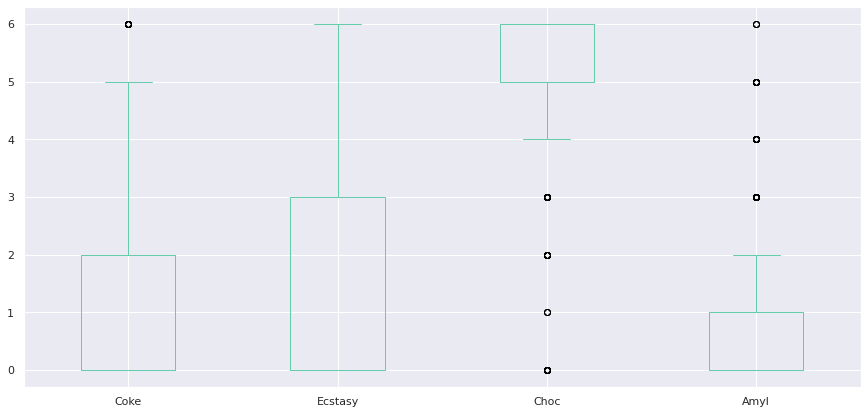

In [ ]:
sns.set_theme()
df.boxplot(column=['Coke','Ecstasy','Choc','Amyl'],color='mediumaquamarine',figsize=(15, 7))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd55f61b250>],
      dtype=object)

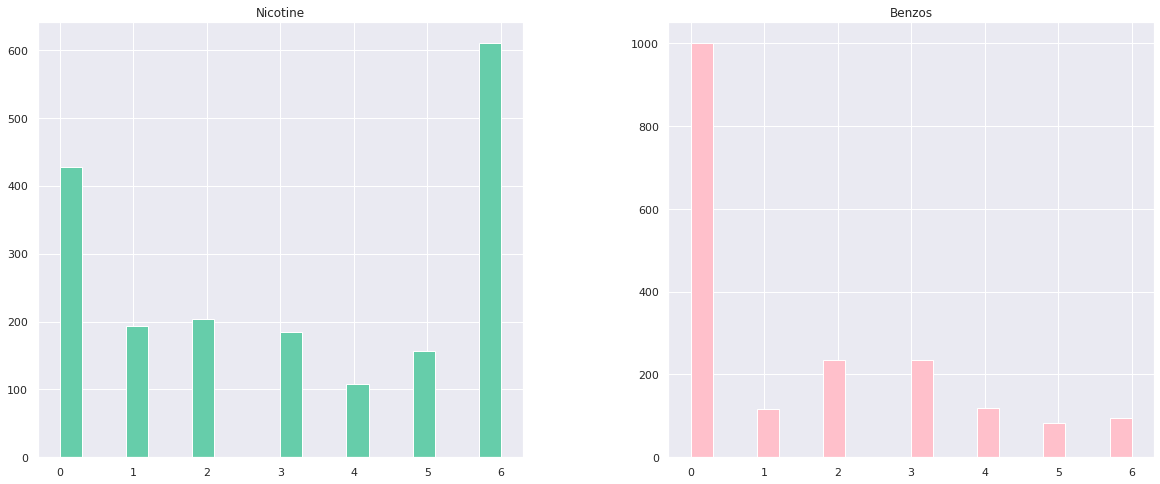

In [ ]:
sns.set_theme()
fix,axs=plt.subplots(1,2,figsize=(20,8),squeeze=False)
df.hist('Benzos',bins=20,ax=axs[0,1],color='pink')
df.hist('Nicotine',bins=20,ax=axs[0,0],color='mediumaquamarine')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

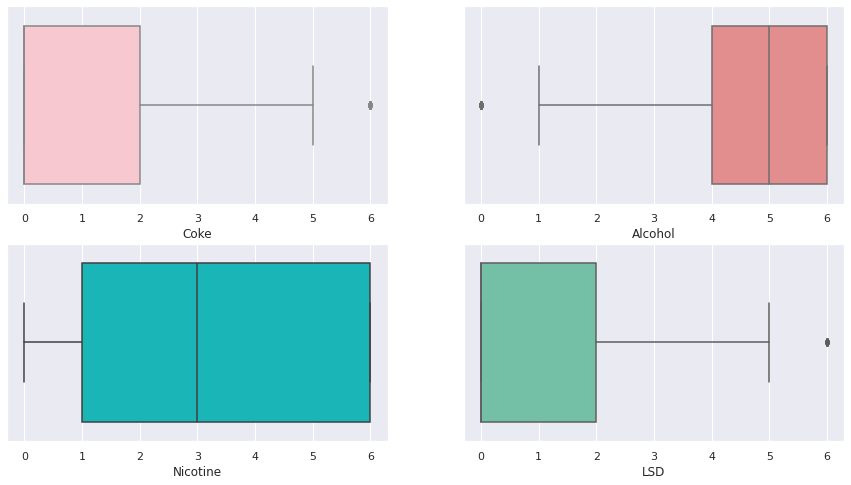

In [ ]:
import seaborn as sns
sns.set_theme()
fix,axs=plt.subplots(2,2,figsize=(15,8),squeeze=False)
sns.boxplot(df['Alcohol'],ax=axs[0,1],color='lightcoral')
sns.boxplot(df['Coke'],ax=axs[0,0],color='pink')
sns.boxplot(df['Nicotine'],ax=axs[1,0],color='darkturquoise')
sns.boxplot(df['LSD'],ax=axs[1,1],color='mediumaquamarine')
plt.show()

Text(0.5, 1.0, 'Coke')

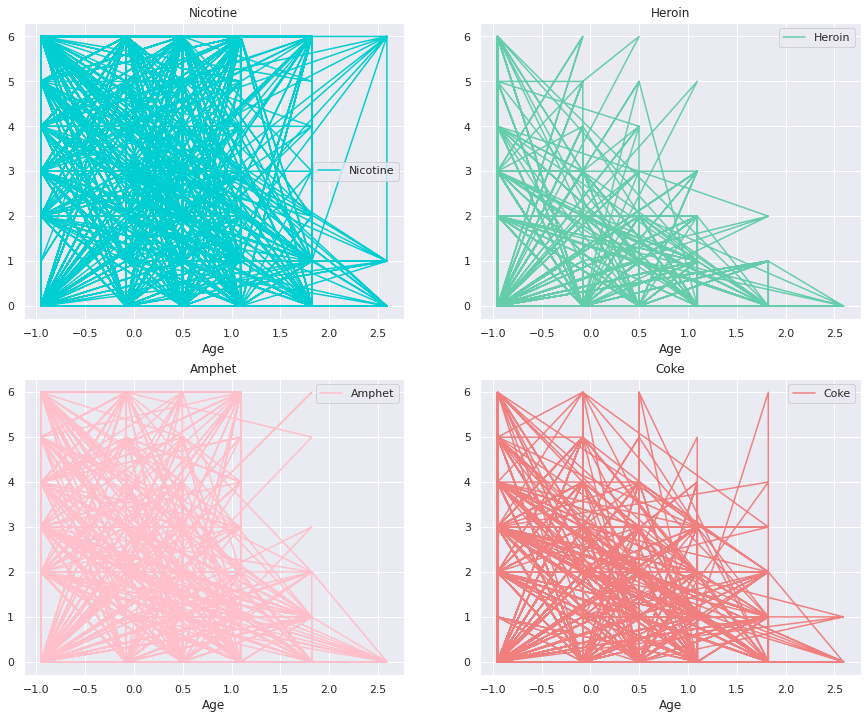

In [ ]:
fix,axs=plt.subplots(2,2,figsize=(15,12),squeeze=False)
df.plot.line(y='Coke',x='Age',color='lightcoral',ax=axs[1,1])
df.plot.line(y='Heroin',x='Age',color='mediumaquamarine',ax=axs[0,1])
df.plot.line(y='Amphet',x='Age',color='pink',ax=axs[1,0])
df.plot.line(y='Nicotine',x='Age',color='darkturquoise',ax=axs[0,0])
axs[0,0].set_title('Nicotine')
axs[0,1].set_title('Heroin')
axs[1,0].set_title('Amphet')
axs[1,1].set_title('Coke')

Text(0.5, 1.0, 'Alcohol')

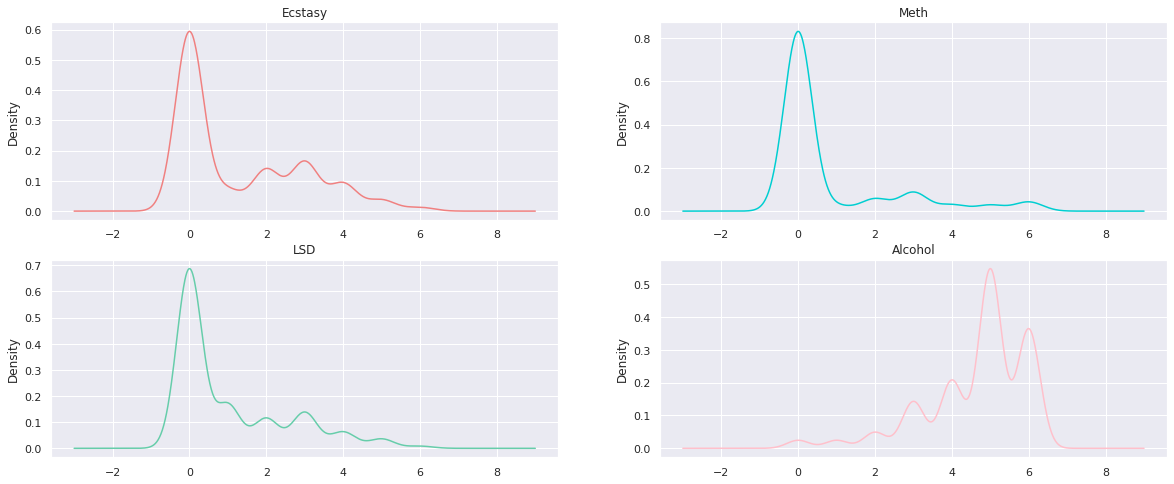

In [ ]:
sns.set_theme()
fix,axs=plt.subplots(2,2,figsize=(20,8),squeeze=False)
df['LSD'].plot.kde(ax=axs[1,0],color='mediumaquamarine')
df['Alcohol'].plot.kde(ax=axs[1,1],color='pink')
df['Ecstasy'].plot.kde(ax=axs[0,0],color='lightcoral')
df['Meth'].plot.kde(ax=axs[0,1],color='darkturquoise')
axs[0,0].set_title('Ecstasy')
axs[0,1].set_title('Meth')
axs[1,0].set_title('LSD')
axs[1,1].set_title('Alcohol')

### 2.2.2 Visuals that show the relation between the features and the classes


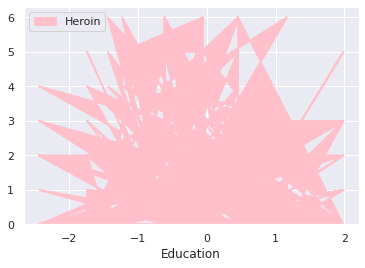

In [ ]:
df.plot.area(y='Heroin',x='Education',color='pink')

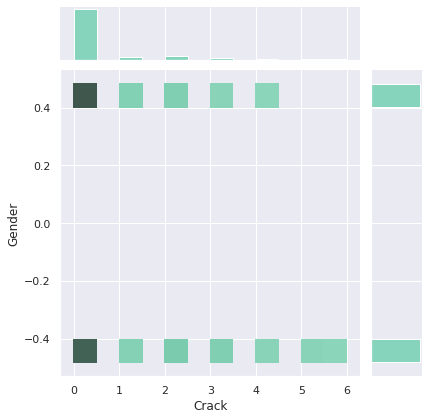

In [ ]:
sns.jointplot(data=df, x="Crack", y="Gender",kind="hist",color='mediumaquamarine')

### 2.2.3 Visual that show the relevance of the features

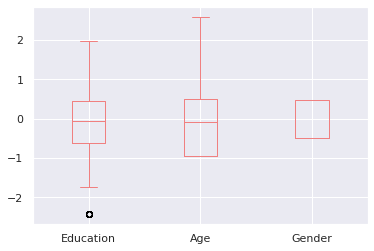

In [ ]:
sns.set_theme()
df.boxplot(column=['Education','Age','Gender'],color='lightcoral')

# 3) Modeling 

## 3.1/ Modeling with non binary class of drug use 

### 3.1.1/ Splitting the data 15%-85% to test our models

In [ ]:
from sklearn.model_selection import train_test_split
def Split(target):
    X_train, X_test, y_train, y_test = train_test_split(df.drop([target,'ID'], axis=1), df[target], test_size = 0.15,
                                                        random_state=2)
    return X_train,X_test,y_train,y_test
X_train,X_test,y_train,y_test=Split('Cannabis')
y_test.describe()

count    283.000000
mean       2.826855
std        2.252277
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max        6.000000
Name: Cannabis, dtype: float64

### 3.1.2/ Model testing 

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

#### 3.1.2.1/ Linear regression

In [ ]:
def score_linearReg(X_train, X_valid, y_train, y_valid):
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    preds=regressor.predict(X_valid)
    return mean_absolute_error(y_valid, preds),regressor.score(X_valid,y_valid)
score_linearReg(X_train, X_test, y_train, y_test)

(1.041889812687304, 0.6430437297309168)

#### 3.1.2.2/ Logistic regression

In [ ]:
def score_logReg(X_train, X_valid, y_train, y_valid):
    logreg = LogisticRegression(max_iter=1000)
    logreg.fit(X_train, y_train)
    preds = logreg.predict(X_valid)
    return mean_absolute_error(y_valid, preds),logreg.score(X_valid,y_valid),cross_val_score(logreg, X_train, y_train, cv = 5, scoring = 'accuracy').mean()

score_logReg(X_train, X_test, y_train, y_test)

(1.0565371024734982, 0.47703180212014135, 0.4482028816199377)

#### 3.1.2.3/ Decision tree 

In [ ]:
def DecTree(X_train, X_valid, y_train, y_valid):
    model = DecisionTreeClassifier(criterion= 'gini', max_depth= 11,min_samples_split= 8,min_samples_leaf=10,max_features='auto')
    model.fit(X_train, y_train)
    preds=model.predict(X_valid)
    return mean_absolute_error(y_valid, preds),model.score(X_valid,y_valid),cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy').mean()

DecTree(X_train, X_test, y_train, y_test)

(1.2226148409893993, 0.4275618374558304, 0.4076129283489097)

#### 3.1.2.4/ Random forest classifier

In [ ]:
def score_RandomF(X_train, X_valid, y_train, y_valid,N):
    model = RandomForestClassifier(n_estimators=N, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds),model.score(X_valid,y_valid),cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy').mean()
    
score_RandomF(X_train, X_test, y_train, y_test,10)

(1.1024734982332156, 0.4628975265017668, 0.440691199376947)

#### 3.1.2.5/ Random forest regression

In [ ]:
def score_RandomF(X_train, X_valid, y_train, y_valid,N):
    model = RandomForestRegressor(n_estimators=N, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds),model.score(X_valid,y_valid)
score_RandomF(X_train, X_test, y_train, y_test,10)

(1.0674911660777386, 0.6259461362131826)

#### 3.1.2.6/ Cross validation and randomized grid search for the random forest models

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 2, stop = 2000, num = 50)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 20, num = 5)]
# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 10, num = 2)]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

NameError: ignored

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
def BestParam_RF_reg(X_train,y_train):
    rf = RandomForestRegressor()
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=2, n_jobs = -1)
    # Fit the random search model
    rf_random.fit(X_train, y_train)
    return rf_random.best_params_
BestParam_RF_reg(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
57 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 459, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

{'bootstrap': False,
 'max_depth': 110,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 857}

In [ ]:
def score_RandomF_Reg(X_train, X_valid, y_train, y_valid,n_estimators,min_samples_split,min_samples_leaf,max_features,max_depth,bootstrap):
    model = RandomForestRegressor(n_estimators= n_estimators,min_samples_split= min_samples_split,min_samples_leaf= min_samples_leaf,max_features= max_features,max_depth= max_depth,bootstrap= bootstrap)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds),model.score(X_valid,y_valid)
    
print(score_RandomF_Reg(X_train, X_test, y_train, y_test,1714,5,1,'sqrt',100,False))

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
def BestParam_RF_class(X_train,y_train):
    rf = RandomForestClassifier()
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=2, n_jobs = -1)
    # Fit the random search model
    rf_random.fit(X_train, y_train)
    return rf_random.best_params_
BestParam_RF_class(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
57 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 459, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 980}

In [ ]:
def score_RandomF_class(X_train, X_valid, y_train, y_valid,n_estimators,min_samples_split,min_samples_leaf,max_features,max_depth,bootstrap):
    model = RandomForestClassifier(n_estimators= n_estimators,min_samples_split= min_samples_split,min_samples_leaf= min_samples_leaf,max_features= max_features,max_depth= max_depth,bootstrap= bootstrap)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds),model.score(X_valid,y_valid),cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy').mean()
    
print(score_RandomF_class(X_train, X_test, y_train, y_test,857,5,1,'sqrt',110,False))

(1.0424028268551238, 0.49823321554770317, 0.48875973520249216)


#### 3.1.2.7/ KNN classifier with cross validation grid search

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

def BestparamKNN(X_train,y_train):
    param_grid2={'n_neighbors': np.arange(1,20), 'metric': ['euclidean', 'manhattan']}
    grid=GridSearchCV(KNeighborsClassifier(),param_grid2,cv=5)
    grid.fit (X_train, y_train)
    return grid.best_params_BestparamKNN(X_train,y_train)

In [ ]:
def score_KNN(X_train, y_train, X_valid, y_valid,n_neighbors,metric):
    model = KNeighborsClassifier(metric=metric,n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds),model.score(X_valid,y_valid),cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy').mean()
score_KNN(X_train, y_train, X_test, y_test,19,'manhattan') 


NameError: ignored

In [ ]:
from sklearn.model_selection import cross_val_score
val_score=[]
for k in range (1,50) :
    score=cross_val_score(KNeighborsClassifier(k),X_train, y_train, cv=5, scoring='accuracy').mean()
    val_score.append(score)
print(val_score.index(0.45756035825545177))
plt.plot(val_score)

#### 3.1.2.8/ Gradient boosting classifier with cross validation grid search

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Gradient Boosting Classifier

grdb_clf = GradientBoostingClassifier(max_depth = 20, max_features = 8, n_estimators=101 ,random_state=2)

param_grid = [{'max_depth': [2, 4, 8, 16, 20], 
                'max_features': [2, 4, 6, 8, 10]}
                ]

grid_search = GridSearchCV(grdb_clf, param_grid=param_grid, cv = 10)
grid_search.fit(X_train, y_train)
grid_search.best_params_


KeyboardInterrupt: ignored

In [ ]:
grdb_clf = GradientBoostingClassifier(max_depth = 20, max_features = 8, n_estimators=101 ,random_state=2)
grdb_clf.fit(X_train, y_train)
grdb_clf_score = cross_val_score(grdb_clf, X_train, y_train, cv = 10, scoring = 'accuracy').mean()
print("Gradient Boosting score: ", grdb_clf_score)
print(grdb_clf.score(X_train, y_train))

In [ ]:
def score_GrBoost(X_train, y_train, X_valid, y_valid):
    model = GradientBoostingClassifier(max_depth = 20, max_features = 8, n_estimators=101 ,random_state=2)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds),model.score(X_valid,y_valid),cross_val_score(model, X_train, y_train, cv = 5, scoring = 'accuracy').mean()
score_GrBoost(X_train, y_train, X_test, y_test)    


#### 3.1.2.9/ MLP Model 


In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
def BestparamMLP(X_train,y_train):
    parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
        
}
    grid=GridSearchCV(MLPClassifier(max_iter=10000),parameter_space,cv=5,n_jobs = -1)
    grid.fit (X_train, y_train)
    return grid.best_params_
BestparamMLP(X_train,y_train)

In [ ]:
def score_MLP(X_train, X_valid, y_train, y_valid):
    MLP = MLPClassifier(activation='relu',alpha=0.05,hidden_layer_sizes=(100,),learning_rate='constant',
                        max_iter=1000, random_state=1)
    MLP.fit(X_train, y_train)
    preds=MLP.predict(X_valid)
    return mean_absolute_error(y_valid, preds),MLP.score(X_valid,y_valid)
score_MLP(X_train, X_test, y_train, y_test)

### 3.1.3/ Apllying the model to all drugs (when a drug i

#### 3.1.3.1/ Loop that predicts for every drug if the patient is a user or not thanks to the random forest regressor

In [ ]:
for target in ['Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Choc','Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','Semer','VSA']:
    Split(target)
    print(score_RandomF_Reg(X_train, X_test, y_train, y_test,1714,5,1,'sqrt',100,False,target))


NameError: ignored

## 3.2/ Modeling with binary class of drug use 

### 3.2.1/ getting the dataset and making it binary

In [ ]:
import pandas as pd
df_binary = pd.read_csv('/content/drug_consumption.data', header=None)
df_binary.columns=(['ID','Age','Gender','Education','Country','Ethnicity','Nscore','Escore','Oscore','Ascore','Cscore','Impulsive','SS','Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Choc','Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','Semer','VSA'])
df_binary=df_binary.replace({'CL1': 0}, regex=True)
df_binary=df_binary.replace({'CL0': 0}, regex=True)
df_binary=df_binary.replace({'CL2': 1}, regex=True)
df_binary=df_binary.replace({'CL3': 1}, regex=True)
df_binary=df_binary.replace({'CL4': 1}, regex=True)
df_binary=df_binary.replace({'CL5': 1}, regex=True)
df_binary=df_binary.replace({'CL6': 1}, regex=True)
df_binary.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,1,1,0,1,1,1,1,0,1,0,1,0,1,1,0,1,0,0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0


In [ ]:
df_binary.dtypes

ID             int64
Age          float64
Gender       float64
Education    float64
Country      float64
Ethnicity    float64
Nscore       float64
Escore       float64
Oscore       float64
Ascore       float64
Cscore       float64
Impulsive    float64
SS           float64
Alcohol        int64
Amphet         int64
Amyl           int64
Benzos         int64
Caff           int64
Cannabis       int64
Choc           int64
Coke           int64
Crack          int64
Ecstasy        int64
Heroin         int64
Ketamine       int64
Legalh         int64
LSD            int64
Meth           int64
Mushrooms      int64
Nicotine       int64
Semer          int64
VSA            int64
dtype: object

### 3.2.2/ Finding corelation between features as targets changed form

                 ID       Age    Gender  ...  Nicotine     Semer       VSA
ID         1.000000  0.271395  0.025467  ...  0.096934  0.042599  0.121215
Age        0.271395  1.000000  0.110286  ...  0.318596  0.038570  0.292265
Gender     0.025467  0.110286  1.000000  ...  0.159519  0.018866  0.129469
Education  0.025253  0.158811  0.196774  ...  0.186958  0.026168  0.145192
Country    0.340751  0.354241  0.216271  ...  0.271755  0.061997  0.287558
Ethnicity  0.059309  0.069753  0.001213  ...  0.079082  0.011467  0.079018
Nscore     0.018639  0.136654  0.074646  ...  0.127224  0.002226  0.103655
Escore     0.046960  0.033849  0.057864  ...  0.009800  0.009033  0.035242
Oscore     0.173565  0.226778  0.131021  ...  0.208535  0.027632  0.158146
Ascore     0.028782  0.063504  0.219743  ...  0.116946  0.021443  0.099566
Cscore     0.072094  0.183564  0.183831  ...  0.200279  0.003950  0.175946
Impulsive  0.119663  0.190939  0.167492  ...  0.214314  0.021836  0.188058
SS         0.165882  0.33

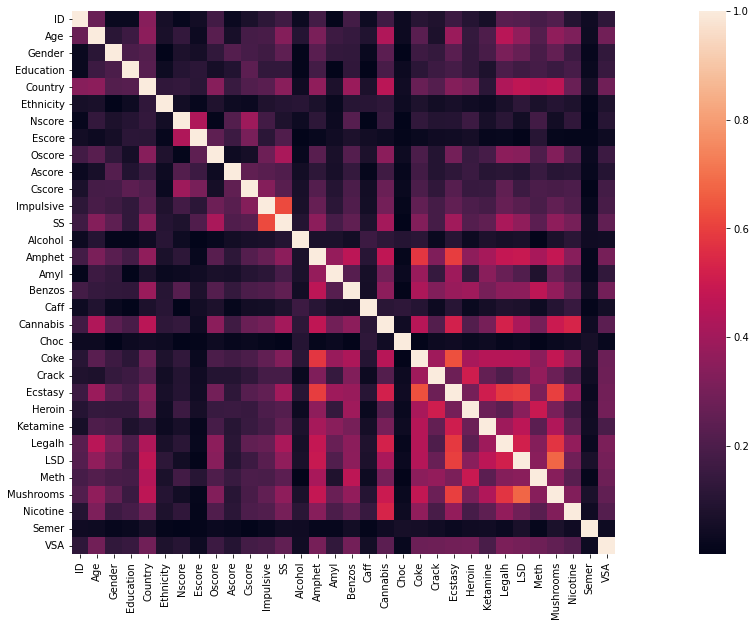

In [ ]:
data=df_binary.copy()

corrmat = data.corr()
corrmat=np.absolute(corrmat)
plt.subplots(figsize=(30, 10))
sns.heatmap(corrmat, vmax=1, square=True)
print(corrmat)

In [ ]:
def Corr_features(target,seuil):
    column_1 = df_binary[target]
    liste=[]
    for column in data:
        column_2 = df_binary[column]
        liste.append( column_1.corr(column_2))
    for i in range(len(liste)): 
        if abs(liste[i]) <seuil:print(liste[i],df_binary.columns[i])

In [ ]:
Corr_features('Nicotine',0.1)

0.09693446279405696 ID
0.07908244624209557 Ethnicity
-0.009800382588285545 Escore
0.03737065295692581 Choc
0.039608144547427705 Semer


In [ ]:
from sklearn.model_selection import train_test_split

def split_binary(target):
  X_train, X_test, y_train, y_test = train_test_split(df_binary.drop([target,'ID'], axis=1), df_binary[target], test_size = 0.15, random_state=2)
  return X_train,X_test,y_train,y_test

y_test.describe()


count    283.000000
mean       2.826855
std        2.252277
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max        6.000000
Name: Cannabis, dtype: float64

### 3.2.3/ Modeling

#### 3.2.3.1/ Basic import 

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.tree import DecisionTreeClassifier


#### 3.2.3.2/ Decision tree and grid search with cross validation to find the best parameters

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV

tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],'min_samples_split' :[2,3,4,5,6,7,8,9,10],'min_samples_leaf' :[2,3,4,5,6,7,8,9,10],'max_features': ['auto', 'sqrt']}
grid=GridSearchCV(DecisionTreeClassifier(),tree_para,cv=5)
grid.fit (X_train, y_train)
grid.best_params_

KeyboardInterrupt: ignored

In [ ]:
def DecTree(X_train, X_valid, y_train, y_valid):
    model = DecisionTreeClassifier(criterion= 'gini', max_depth= 11,min_samples_split= 8,min_samples_leaf=10,max_features='auto')
    model.fit(X_train, y_train)
    preds=model.predict(X_valid)
    return model.score(X_valid,y_valid)
    

DecTree(X_train, X_test, y_train, y_test)

#### 3.2.3.3/ Linear regression model

In [ ]:
def score_linearReg(X_train, X_valid, y_train, y_valid):
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    preds=regressor.predict(X_valid)
    return regressor.score(X_valid,y_valid)
    

score_linearReg(X_train, X_test, y_train, y_test)

0.6163710449962863

#### 3.2.3.4/ Logistic regression model

In [ ]:
def score_logReg(X_train, X_valid, y_train, y_valid):
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    preds = logreg.predict(X_valid)
    return logreg.score(X_valid,y_valid)
    
score_logReg(X_train, X_test, y_train, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.4628975265017668

#### 3.2.3.5/ Random forest classifier and  random grid search with cross validation to find the best hyperparameters possible

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(random_state=42)

param_grid = { 
    'criterion' : ['gini', 'entropy'],
    'n_estimators': [int(x) for x in np.linspace(start = 2, stop = 1000, num = 10)],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
    'min_samples_split' : [int(x) for x in np.linspace(start = 2, stop = 20, num = 5)],
    'min_samples_leaf' : [int(x) for x in np.linspace(start = 2, stop = 10, num = 2)]
}
from sklearn.model_selection import RandomizedSearchCV
def BestParamRF(X_train,y_train):
    rf = RandomForestClassifier()
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter = 100, cv = 3, verbose=2, random_state=2, n_jobs = -1)
    # Fit the random search model
    rf_random.fit(X_train, y_train)
    return rf_random.best_params_
#BestParamRF(X_train,y_train)

In [ ]:
def Score_RFClass(X_train,y_train,X_test,y_test,criterion,n_estimators,max_features,max_depth,min_samples_split,min_samples_leaf):
    randomForestFinalModel = RandomForestClassifier(random_state = 2, criterion = criterion , max_depth = max_depth, max_features = max_features, n_estimators = n_estimators,min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split)
    randomForestFinalModel.fit(X_train, y_train)
    preds=randomForestFinalModel.predict(X_test)
    return randomForestFinalModel.score(X_test,y_test)
    
Score_RFClass(X_train,y_train,X_test,y_test,'entropy',445,'sqrt',30,11,2)


0.9646643109540636

#### 3.2.3.5/ KNN classifier and grid search with cross validation to find best hyperparameters

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
param_grid={'n_neighbors': np.arange(1,20), 'metric': ['euclidean', 'manhattan']}
grid=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)
grid.fit (X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [ ]:
grid.best_params_


NameError: ignored

In [ ]:
def score_KNN(X_train, y_train, X_valid, y_valid,n_neighbors,metric):
    model = KNeighborsClassifier(metric=metric,n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return model.score(X_valid,y_valid)
score_KNN(X_train, y_train, X_test, y_test,5,'manhattan')

0.4134275618374558

### 3.2.4/ Comparing models for evey targets

In [ ]:
Dict_score={}
for target in ['Alcohol','Cannabis','Coke','Crack','Ecstasy','Heroin','LSD','Nicotine']:
    X_train,X_test,y_train,y_test=split_binary(target)
    Dict_score[target]=[score_KNN(X_train, y_train, X_test, y_test,5,'manhattan'),
                        Score_RFClass(X_train, y_train, X_test, y_test,'gini',889,'sqrt',100,11,2),
                       score_logReg(X_train, X_test, y_train, y_test)]
print(Dict_score)

In [ ]:
df_scores=pd.DataFrame.from_dict(Dict_score)

In [ ]:
labels = ['Alcohol','Cannabis','Coke','Crack','Ecstasy','Heroin','LSD','Nicotine']
KNN = df_scores.iloc[0]
RF = df_scores.iloc[1]
logreg = df_scores.iloc[2]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 7))
rects1 = ax.bar(x - width, KNN, width, label='KNN',color='mediumaquamarine')
rects2 = ax.bar(x, RF, width, label='Random forest',color='pink')
rects3 = ax.bar(x + width, logreg, width, label='Logistic regression',color='darkturquoise')

ax.set_ylabel('individuals')
ax.set_title('Number of individuals per label for each drug')
ax.xaxis.set_ticklabels(['','Alcohol', 'Cannabis', 'Coke', 'Crack', 'Ecstasy','Heroin','LSD','Nicotine'])
ax.legend()

fig.tight_layout()
plt.show()

In [ ]:
y_train=df['Cannabis']
X_train=df.drop('Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Choc','Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','Semer','VSA',axis=1)
model = RandomForestRegressor(n_estimators=857, min_samples_split=5,
                                  min_samples_leaf=1, max_features="sqrt", max_depth=110,
                                  bootstrap=False)
okk=model.fit(X_train, y_train)
pickle.dump(okk, open("drug.pkl","wb"))

# 4.Flask API


In [ ]:
def model():
  y_train=df['Cannabis']
  X_train=df.drop(['Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Choc','Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','Semer','VSA'],axis=1)
  model = RandomForestRegressor(n_estimators=857, min_samples_split=5,
                                  min_samples_leaf=1, max_features="sqrt", max_depth=110,
                                  bootstrap=False)
  okk=model.fit(X_train, y_train)
  return okk

In [ ]:
import pickle
pickle.dump(model(), open("drug.pkl","wb"))